<a href="https://colab.research.google.com/github/yamini1998m/Unsupervised-ML-Submission.ipynb/blob/main/Unsupervised_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering

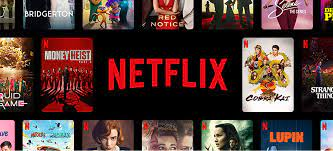

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1** - Priyabrata Biswal
##### **Team Member 2** - Yamini Mehendwariya


# **Project Summary -**

This data set consists of tv shows and movies available on netflix as of 2019.
The dataset is collected from flexible which is a third-party Netflix Search Engine.In 2018,they realesed a interesting report which shows that the number of tv shows on Netflix has nearly tripled since 2010. The Streaming Service's number of movies has decreased by more than 2000 titles since 2010,While its number of TV Shows has nearly Tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
  
  Integrating this dataset with other external datasets such as IMDB ratings,
  rotten tomatoes can also provide many interesting findings.

# **GitHub Link -**

Priyabrata Biswal https://github.com/prbrtbiswal/Unsupervised-ML            
Yamini Mehendwariya https://github.com/yamini1998m/Unsupervised-ML-Submission.ipynb

# **Problem Statement**


1.Netflix is the world's largest online streaming service provider, with over 220 million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.
2. We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.
3.The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.




# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Data_set=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df=Data_set.copy()

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    7787
dtype: int64

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

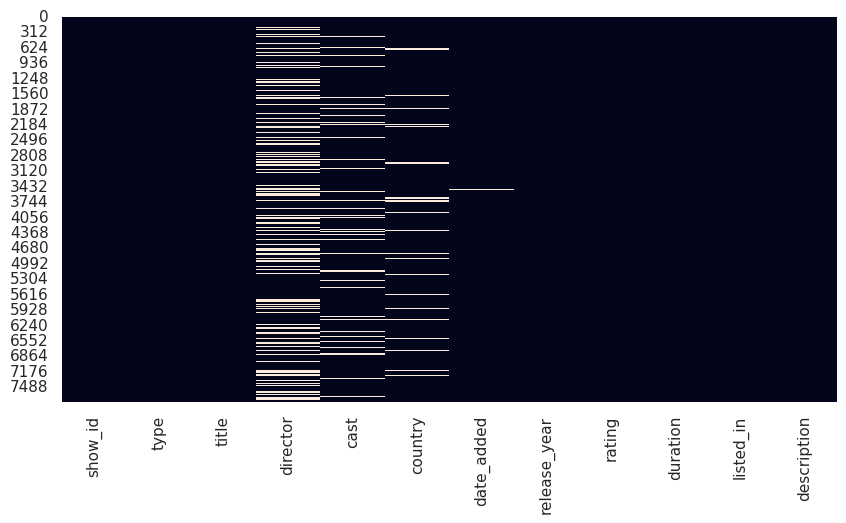

In [10]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

There are many missing values in director, cast, country, date_added, and rating columns.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of
seasons

listed_in : Genre

description: The Summary description

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64



*  The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
*  10 records with missing values in the date_added column can be dropped.


*   The missing values in rating can be imputed with its mode, since this attribute is discrete.






## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [18]:
df.shape

(7777, 12)

We have successfully handled all the missing values in the dataset.

**Country, listed_in:**

In [19]:
# Top countries
df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [20]:
# Genre of shows
df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64




1.There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.


2.To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.


3.Also, let's consider only the primary genre of the respective movie / TV show.







In [21]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [22]:
# contry in which a movie was produced
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [23]:
# genre of shows
df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

# **Typecasting 'duration' from string to integer**

In [24]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [25]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [26]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [27]:
# datatype of duration
df.duration.dtype

dtype('int64')

We have successfully converted the datatype of duration column to int.

# **Typecasting 'date_added' from string to datetime:**

In [28]:
# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

In [29]:
# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [30]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

#  Rating:

<Axes: xlabel='rating', ylabel='count'>

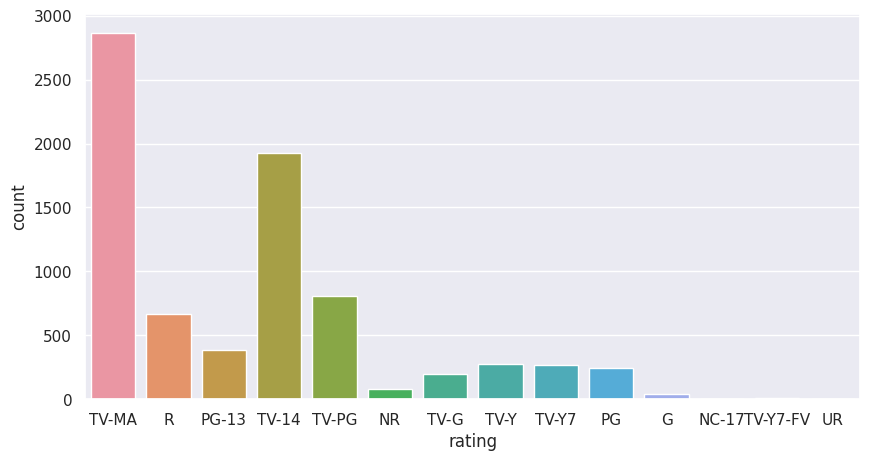

In [31]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG

In [32]:
# Age ratings
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [33]:
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

<Axes: xlabel='rating', ylabel='count'>

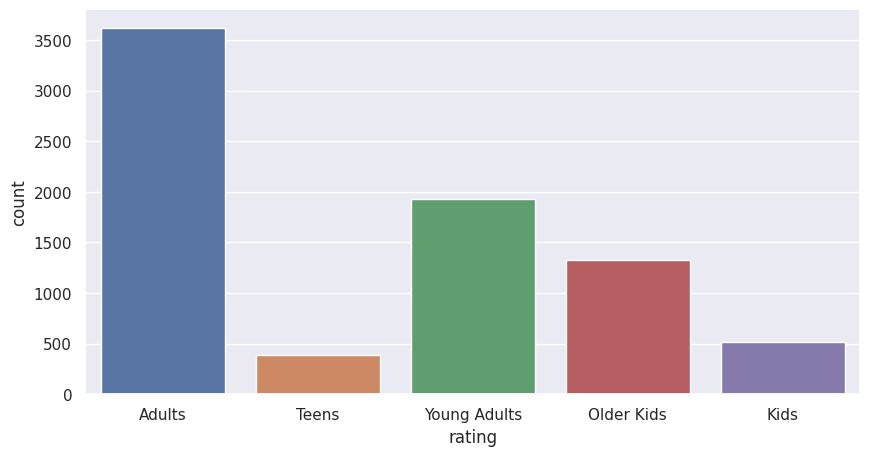

In [34]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

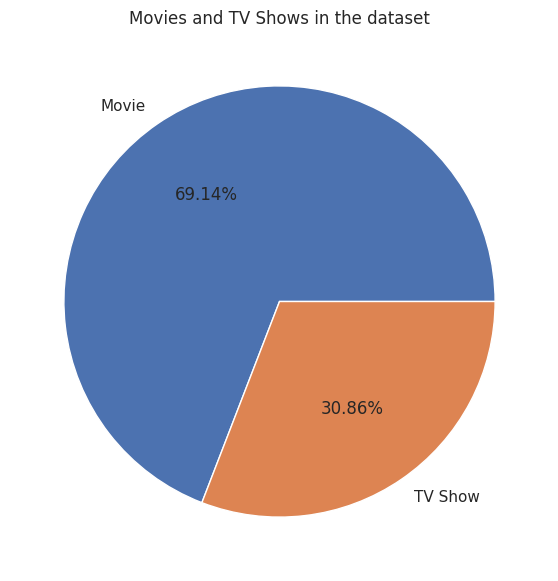

In [35]:
# Chart - 1 visualization code
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

There are more movies (69.14%) than TV shows (30.86%) in the dataset.

#### Chart - 2

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

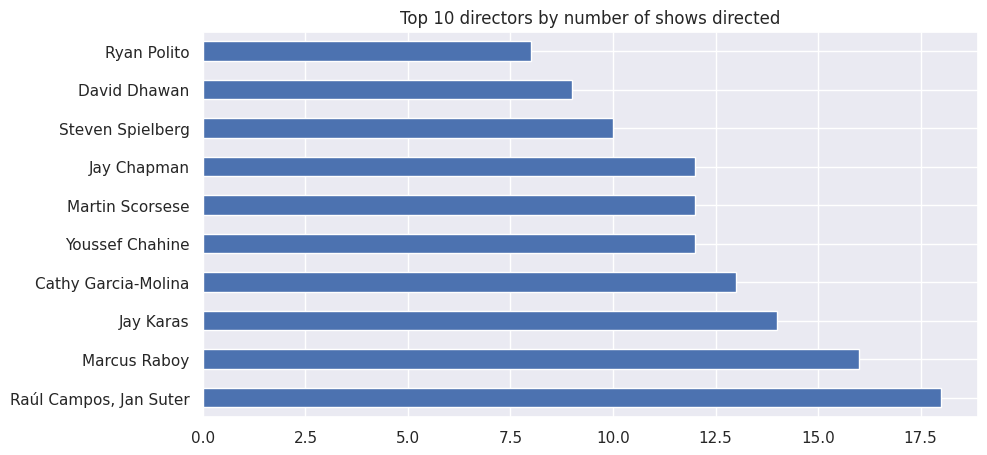

In [36]:
# Chart - 2 visualization code
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.

#### Chart - 3

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

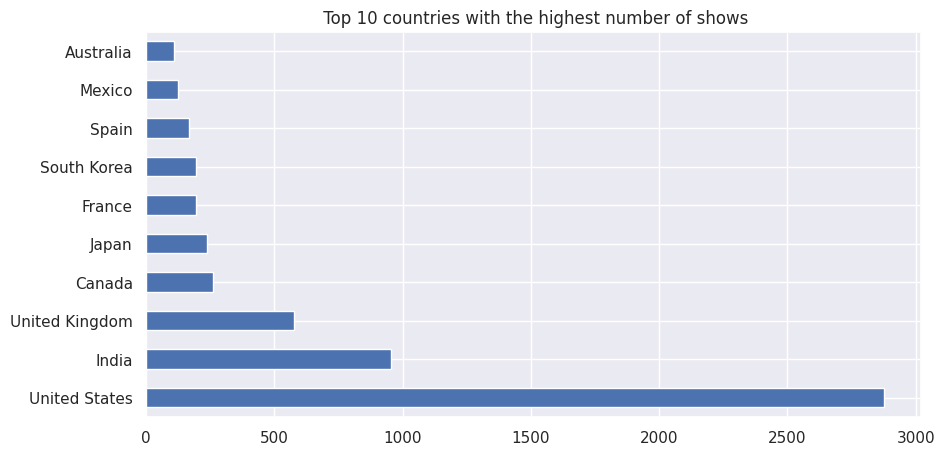

In [37]:
# Chart - 3 visualization code
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

The highest number of movies / TV shows were based out of the US, followed by India and UK.

#### Chart - 4

Text(0.5, 1.0, 'distribution by released year')

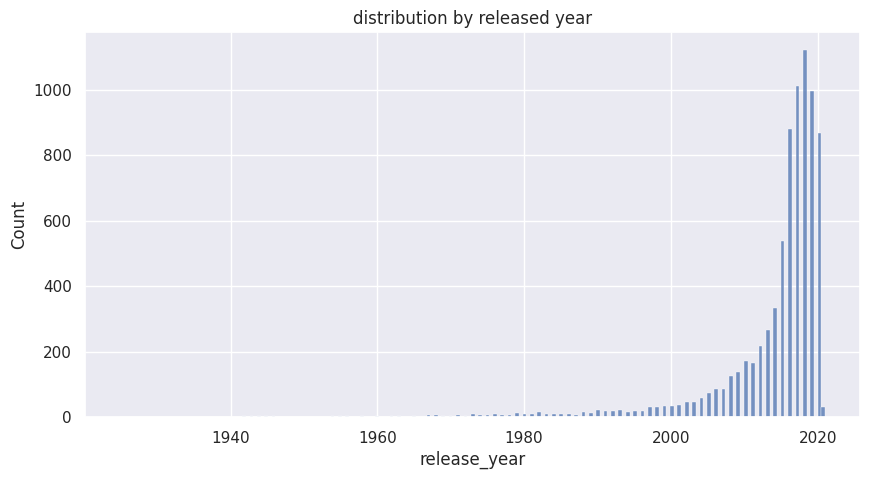

In [38]:
# Chart - 4 visualization code
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

Netflix has greater number of new movies / TV shows than the old ones.

#### Chart - 5

Text(0.5, 1.0, 'Top 10 genres')

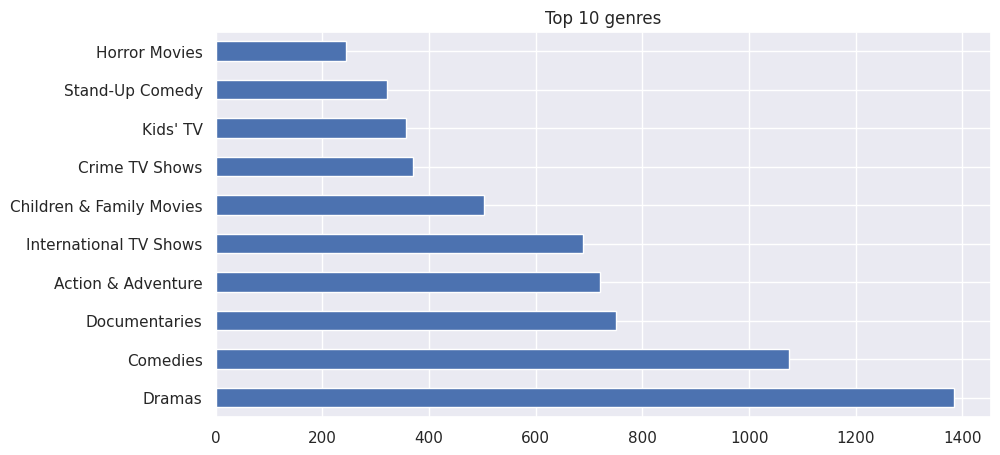

In [39]:
# Chart - 5 visualization code
# Top 10 genres
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

#### Chart - 6

Text(0.5, 0, '')

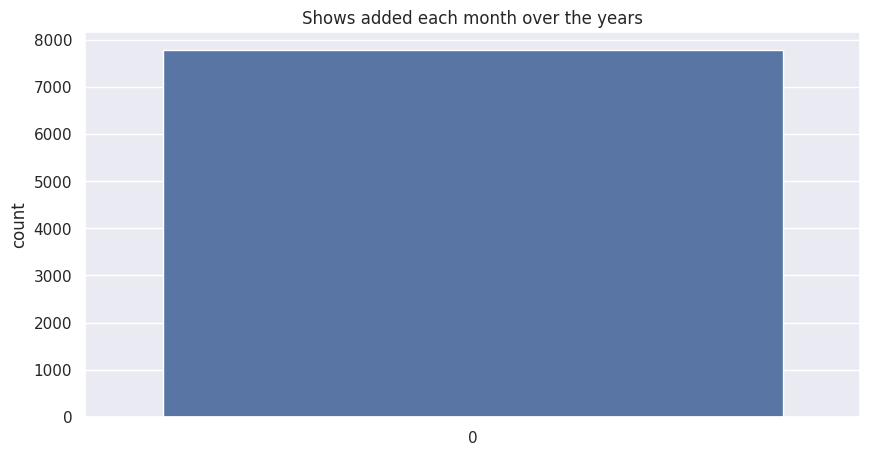

In [40]:
# Chart - 6 visualization code
# Number of shows added on different months
plt.figure(figsize = (10,5))
sns.countplot(df['month_added'])
plt.title('Shows added each month over the years')
plt.xlabel('')

Over the years a greater number of shows were added in the months of October, November, December, and January.

#### Chart - 7

Text(0.5, 0, '')

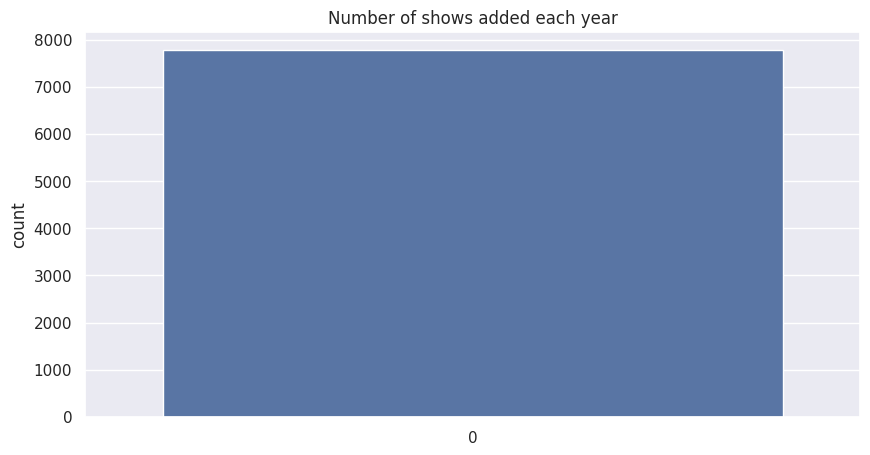

In [41]:
# Chart - 7 visualization code
# Number of shows added over the years
plt.figure(figsize = (10,5))
sns.countplot(df['year_added'])
plt.title('Number of shows added each year')
plt.xlabel('')

Netflix continuous to add more shows on its platform over the years.

There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.

We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.

#### Chart - 8

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

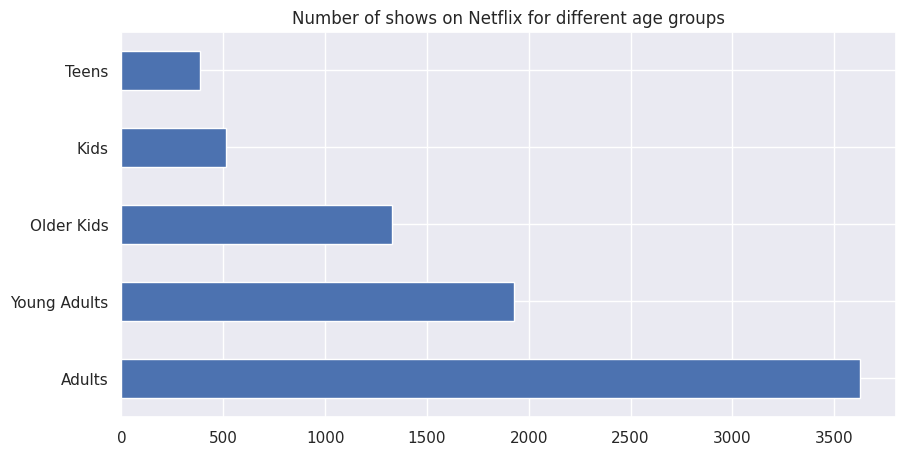

In [42]:
# Chart - 8 visualization code
# Number of shows on Netflix for different age groups
plt.figure(figsize=(10,5))
df.rating.value_counts().plot(kind='barh')
plt.title('Number of shows on Netflix for different age groups')

The majority of the shows on Netflix are catered to the needs of adult and young adult population.

#### Chart - 9

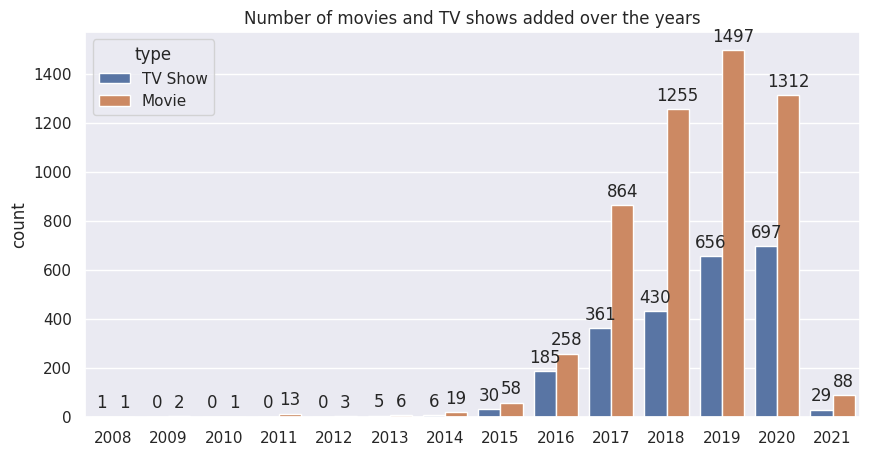

In [43]:
# Chart - 9 visualization code
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### Chart - 10

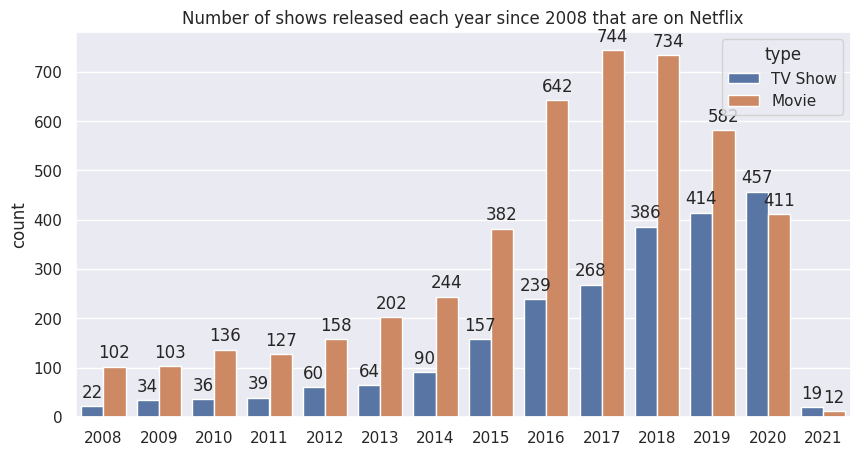

In [44]:
# Chart - 10 visualization code
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Over the years, Netflix has consistently focused on adding more shows in its platform.


Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.


This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

#### Chart - 11

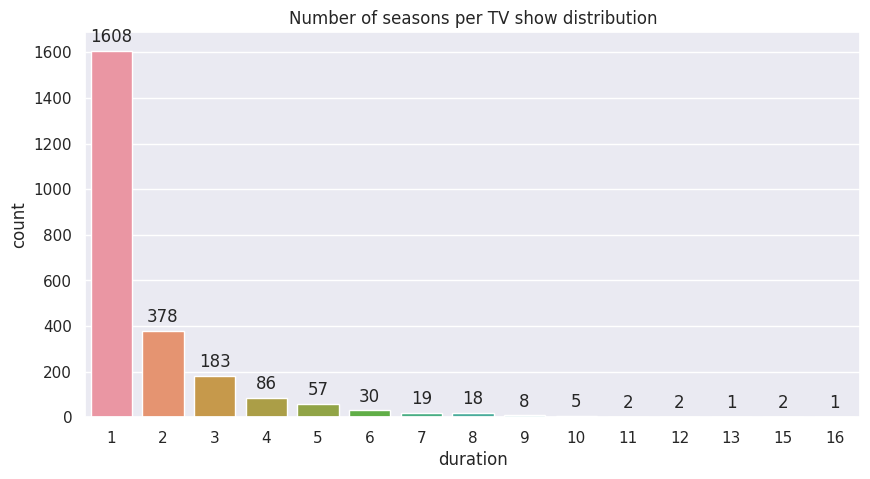

In [45]:
# Chart - 11 visualization code
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [46]:
# % of tv shows with just 1 season
len(df[(df['type']=='TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])* 100

67.0

The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.

There are very few TV shows that have more than 8 seasons.

#### Chart - 12

Text(0.5, 1.0, 'Movie duration distribution')

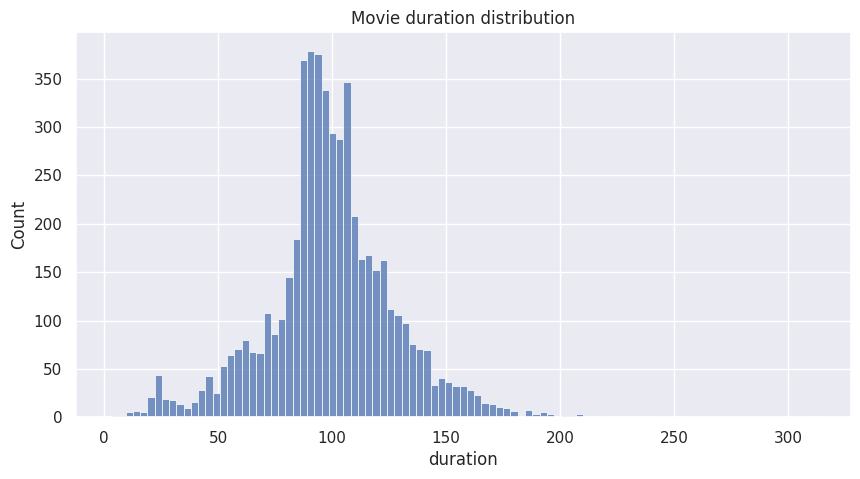

In [47]:
# Chart - 12 visualization code
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

In [48]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

#### Chart - 13

Text(0.5, 1.0, 'Top 10 genres for movies')

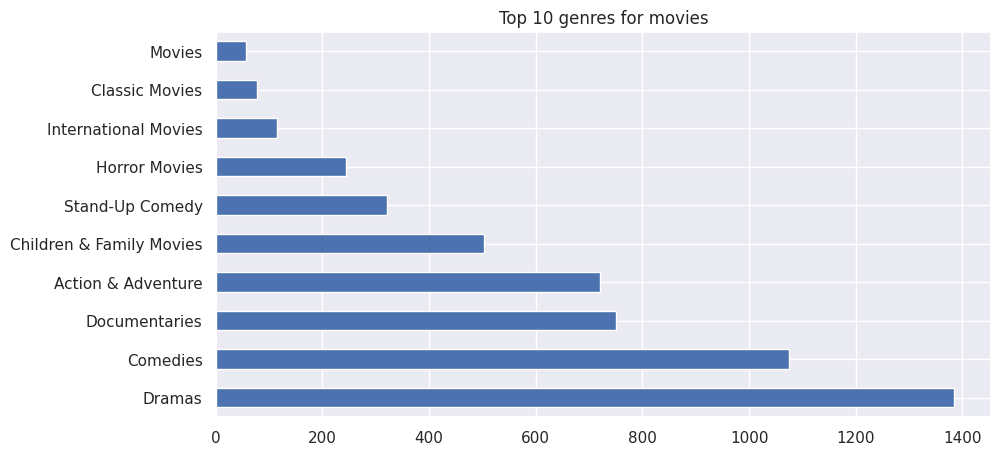

In [49]:
# Chart - 13 visualization code
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

Dramas, comedies, and documentaries are the most popular genre for the movies on Netflix.

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

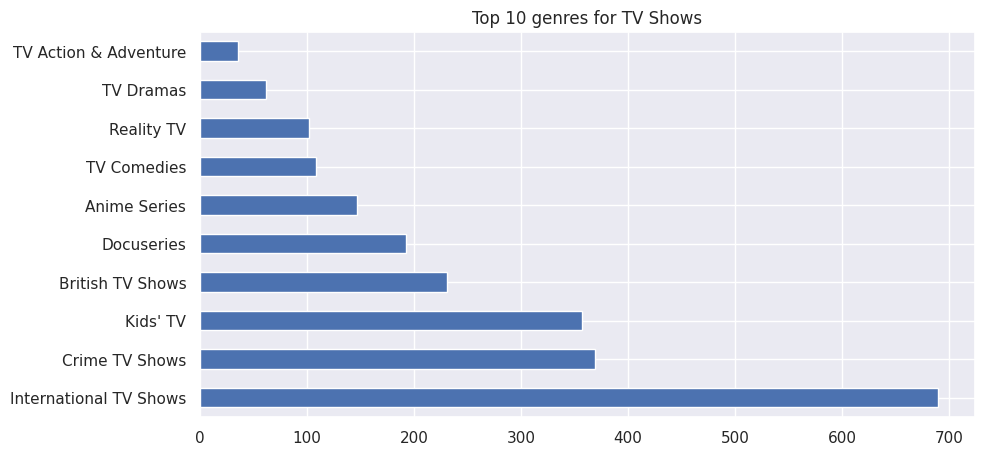

In [50]:
# Correlation Heatmap visualization code
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

International, crime, and kids are the most popular genre for TV shows on Netflix.

# **Modelling Approach:**

1.Select the attributes based on which you want to cluster the shows

2.Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.

3.Lemmatization to generate a meaningful word out of corpus of words

4.Tokenization of corpus

5.Word vectorization

6.Dimensionality reduction

7.Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques

8.Build optimal number of clusters and visualize the contents of each cluster using wordclouds.


We will cluster the shows on Netflix based on the following attributes:

Director

Cast

Country

Listed in (genres)

Description

In [51]:
# Using the original dataset for clustering since
# it does not require handling missing values
df1 = Data_set.copy()

In [52]:
df1.fillna('',inplace=True)

In [53]:
# Combining all the clustering attributes into a single column

df1['clustering_attributes'] = (df1['director'] + ' ' +
                                df1['cast'] +' ' +
                                df1['country'] +' ' +
                                df1['listed_in'] +' ' +
                                df1['description'])

In [54]:
df1['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

**.**We have successfully added all the necessary data into a single column